In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando o dataset

Como o dataset está no formato .asc, ele pode ser carregado como um csv, porém indicando à função 'read_csv' que o separador é um espaço.

Após o carregamento do dataset, podemos verificar as dimensões do mesmo e as primeiras linhas para ter certeza que o dataset foi carregado corretamente

In [2]:
df = pd.read_csv('data/SouthGermanCredit.asc', sep=' ')
df.shape

(1000, 21)

In [3]:
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


# Verificações

A descrição do dataset informa quais features o dataset possui, quantidade de dados e que não há dados nulos. Porém é bom sempre verificar que os dados realmente estão conforme a descrição.

## Colunas

In [4]:
print('Número de colunas', len(df.columns))
df.columns

Número de colunas 21


Index(['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit'],
      dtype='object')

## Dados

In [5]:
df.describe()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


### Variáveis categóricas

In [6]:
cat_var = ['laufkont', 'moral', 'verw', 'sparkont', 'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit']

cont_var = [col for col in df.columns if col not in cat_var]

In [7]:
cat_var

['laufkont',
 'moral',
 'verw',
 'sparkont',
 'beszeit',
 'rate',
 'famges',
 'buerge',
 'wohnzeit',
 'verm',
 'weitkred',
 'wohn',
 'bishkred',
 'beruf',
 'pers',
 'telef',
 'gastarb',
 'kredit']

In [8]:
cont_var

['laufzeit', 'hoehe', 'alter']

In [9]:
for cat in cat_var:
    print(f'{cat}: ', np.sort(df[cat].unique()))

laufkont:  [1 2 3 4]
moral:  [0 1 2 3 4]
verw:  [ 0  1  2  3  4  5  6  8  9 10]
sparkont:  [1 2 3 4 5]
beszeit:  [1 2 3 4 5]
rate:  [1 2 3 4]
famges:  [1 2 3 4]
buerge:  [1 2 3]
wohnzeit:  [1 2 3 4]
verm:  [1 2 3 4]
weitkred:  [1 2 3]
wohn:  [1 2 3]
bishkred:  [1 2 3 4]
beruf:  [1 2 3 4]
pers:  [1 2]
telef:  [1 2]
gastarb:  [1 2]
kredit:  [0 1]


Todas as variáveis estão nos ranges descritos no arquivo codetable.txt.
A exceção é a variável 'verw' (propósito), onde não há nenhum valor na categoria 7 (educação).

### Valores nulos

In [10]:
df.isnull().sum(axis = 0)

laufkont    0
laufzeit    0
moral       0
verw        0
hoehe       0
sparkont    0
beszeit     0
rate        0
famges      0
buerge      0
wohnzeit    0
verm        0
alter       0
weitkred    0
wohn        0
bishkred    0
beruf       0
pers        0
telef       0
gastarb     0
kredit      0
dtype: int64

Não há valores nulos em nenhuma das colunas

### Distribuição da variável 'kredit' (credit_risk)

In [11]:
df['kredit'].value_counts()

kredit
1    700
0    300
Name: count, dtype: int64

# Exploração

Com a comprovação que o dataset estã ok, podemos seguir para a exploração de cada variável e tentar tirar algumas conclusões deste dataset

## Análise das variáveis contínuas

Verificação da distribuição das variáveis contínuas, através de histogramas

array([[<Axes: title={'center': 'laufzeit'}>,
        <Axes: title={'center': 'hoehe'}>],
       [<Axes: title={'center': 'alter'}>, <Axes: >]], dtype=object)

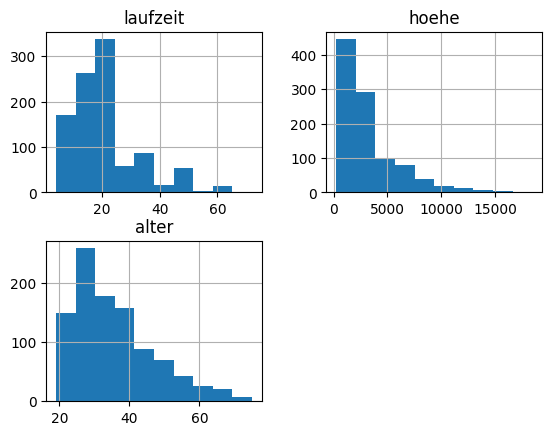

In [12]:
df[cont_var].hist()

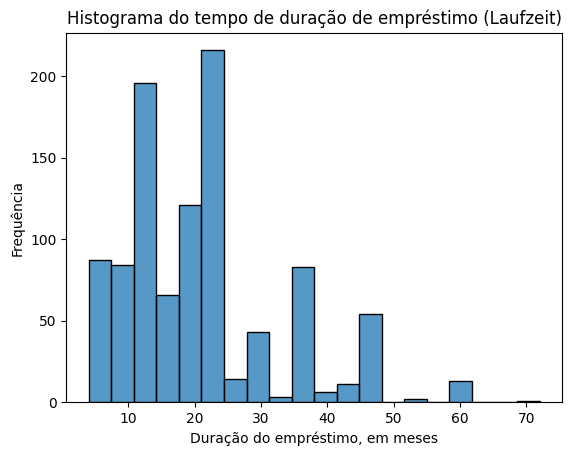

In [32]:
sns.histplot(df['laufzeit'], kde=False, bins=20)

# Definir título e labels
plt.title('Histograma do tempo de duração de empréstimo (Laufzeit)')
plt.xlabel('Duração do empréstimo, em meses')
plt.ylabel('Frequência')

plt.show()

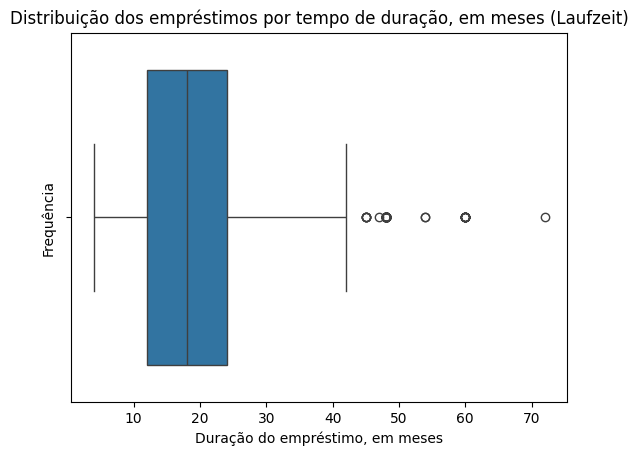

Quartil de 25%:  12.0
Quartil de 75%:  24.0


In [33]:
sns.boxplot(x=df['laufzeit'])

plt.title('Distribuição dos empréstimos por tempo de duração, em meses (Laufzeit)')
plt.xlabel('Duração do empréstimo, em meses')
plt.ylabel('Frequência')

plt.show()

print('Quartil de 25%: ', df['laufzeit'].quantile(0.25))
print('Quartil de 75%: ', df['laufzeit'].quantile(0.75))

A maior parte dos empréstimos possuem uma duração entre 12 e 24 meses

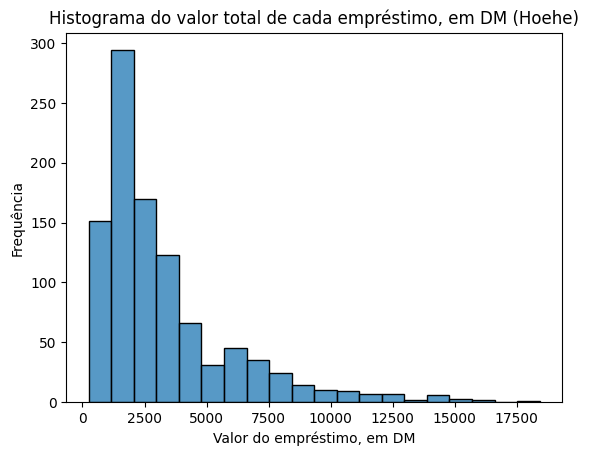

In [36]:
sns.histplot(df['hoehe'], kde=False, bins=20)

# Definir título e labels
plt.title('Histograma do valor total de cada empréstimo, em DM (Hoehe)')
plt.xlabel('Valor do empréstimo, em DM')
plt.ylabel('Frequência')

plt.show()

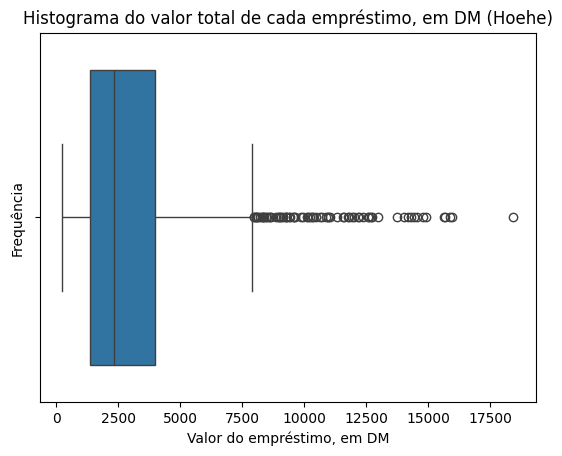

Quartil de 25%:  1365.5
Quartil de 75%:  3972.25


In [37]:
sns.boxplot(x=df['hoehe'])

plt.title('Histograma do valor total de cada empréstimo, em DM (Hoehe)')
plt.xlabel('Valor do empréstimo, em DM')
plt.ylabel('Frequência')

plt.show()

print('Quartil de 25%: ', df['hoehe'].quantile(0.25))
print('Quartil de 75%: ', df['hoehe'].quantile(0.75))

O valor da maior parte dos empréstimos está entre DM 1365.5 e DM 3972.25

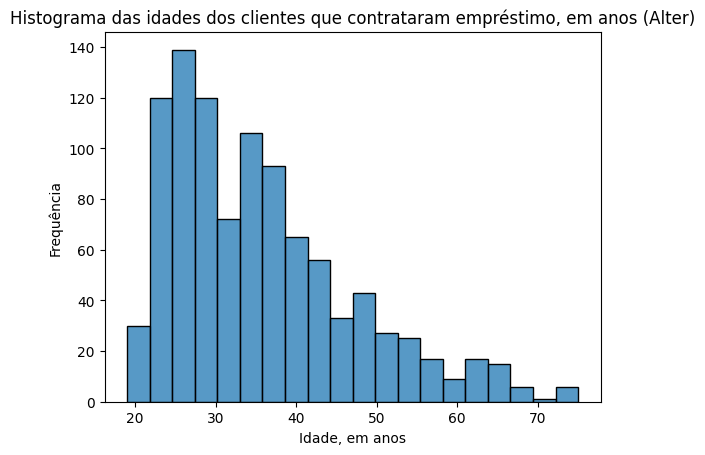

In [38]:
sns.histplot(df['alter'], kde=False, bins=20)

# Definir título e labels
plt.title('Histograma das idades dos clientes que contrataram empréstimo, em anos (Alter)')
plt.xlabel('Idade, em anos')
plt.ylabel('Frequência')

plt.show()

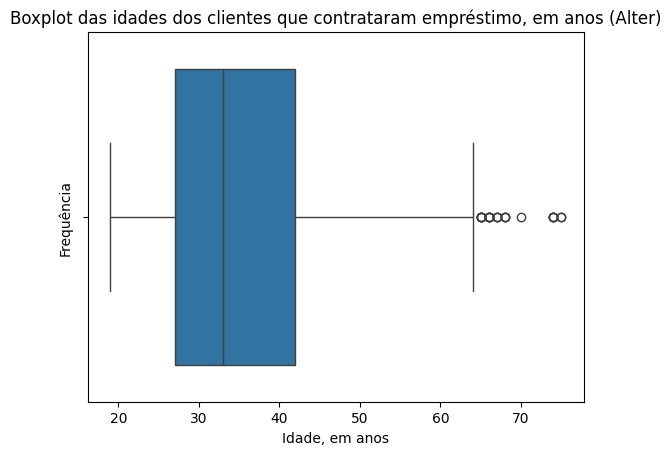

Quartil de 25%:  27.0
Quartil de 75%:  42.0


In [39]:
sns.boxplot(x=df['alter'])

plt.title('Boxplot das idades dos clientes que contrataram empréstimo, em anos (Alter)')
plt.xlabel('Idade, em anos')
plt.ylabel('Frequência')

plt.show()

print('Quartil de 25%: ', df['alter'].quantile(0.25))
print('Quartil de 75%: ', df['alter'].quantile(0.75))

A maior parte dos clientes possuem entre 27 e 42 anos

## Análise das variáveis categoricas

In [80]:
# Definir função para plotar os gráficos
def plot_graph(column, labels, title, xlabel, ylabel):
    #Calcular as quantidades de cada categoria
    counts = df[column].value_counts().sort_index()

    # Plotar gráfico
    plt.bar(counts.index, counts.values)

    # Configurar legendas para apresentar a descrição das categorias
    plt.xticks(ticks=counts.index, labels=[labels[val] for val in counts.index], rotation=45)

    # Configurar título e legendas
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Plotar
    plt.tight_layout()
    plt.show()

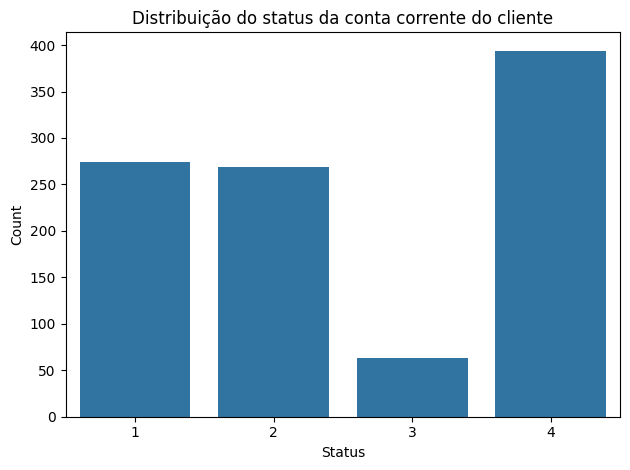

In [55]:
sns.countplot(x=df['laufkont'])
plt.title('Distribuição do status da conta corrente do cliente')
plt.xlabel('Status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

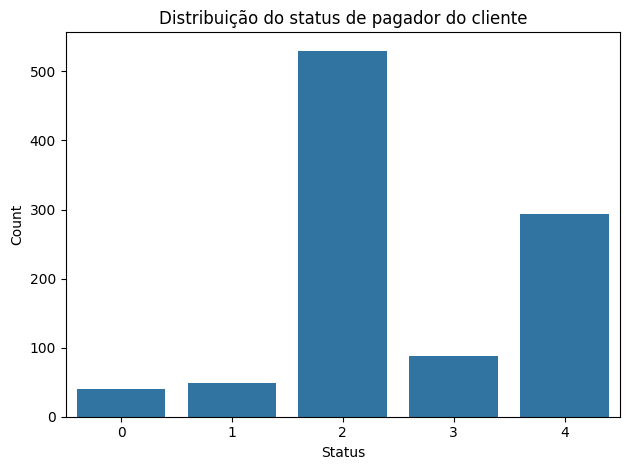

In [56]:
sns.countplot(x=df['moral'])
plt.title('Distribuição do status de pagador do cliente')
plt.xlabel('Status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

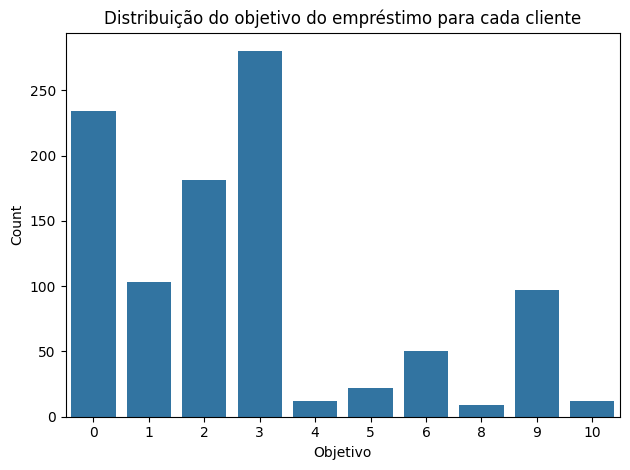

In [59]:
# Plotar o boxplot
sns.countplot(x=df['verw'])
plt.title('Distribuição do objetivo do empréstimo para cada cliente')
plt.xlabel('Objetivo')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

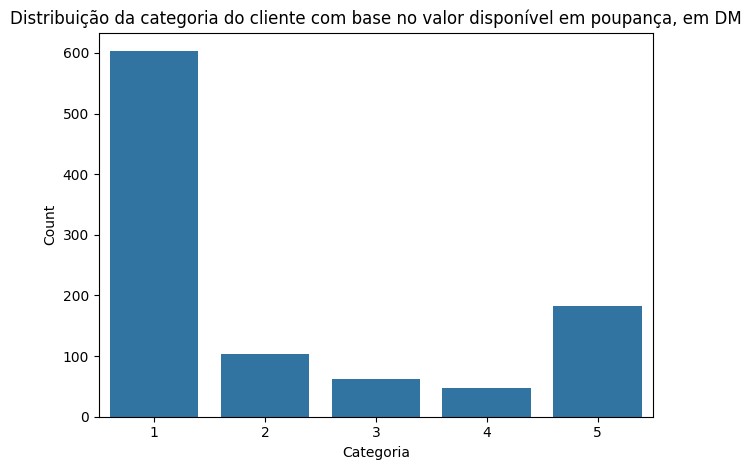

In [58]:
sns.countplot(x=df['sparkont'])
plt.title('Distribuição da categoria do cliente com base no valor disponível em poupança, em DM')
plt.xlabel('Categoria')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

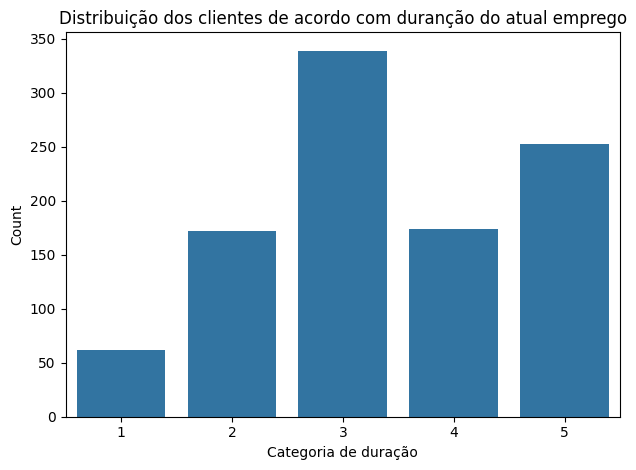

In [60]:
# Plotar o boxplot
sns.countplot(x=df['beszeit'])
plt.title('Distribuição dos clientes de acordo com duranção do atual emprego')
plt.xlabel('Categoria de duração')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

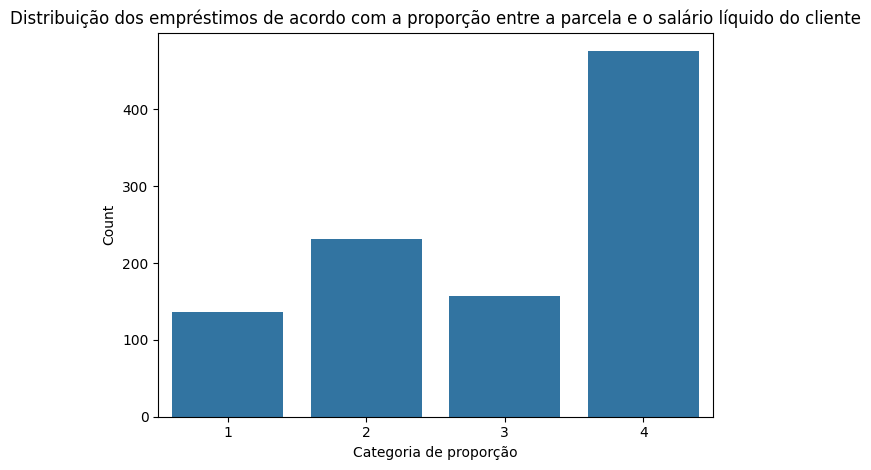

In [61]:
sns.countplot(x=df['rate'])
plt.title('Distribuição dos empréstimos de acordo com a proporção entre a parcela e o salário líquido do cliente')
plt.xlabel('Categoria de proporção')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

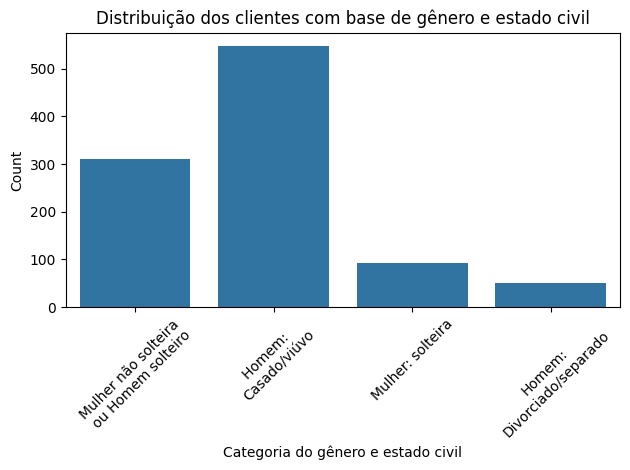

In [76]:
# sns.countplot(x=df['famges'])

custom_labels = {1: 'Homem:\nDivorciado/separado', 
                 2: 'Mulher não solteira\n ou Homem solteiro', 
                 3: 'Homem: \nCasado/viúvo',
                 4: 'Mulher: solteira'}
sns.countplot(x=df['famges'].map(custom_labels))

plt.title('Distribuição dos clientes com base de gênero e estado civil')
plt.xlabel('Categoria do gênero e estado civil')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

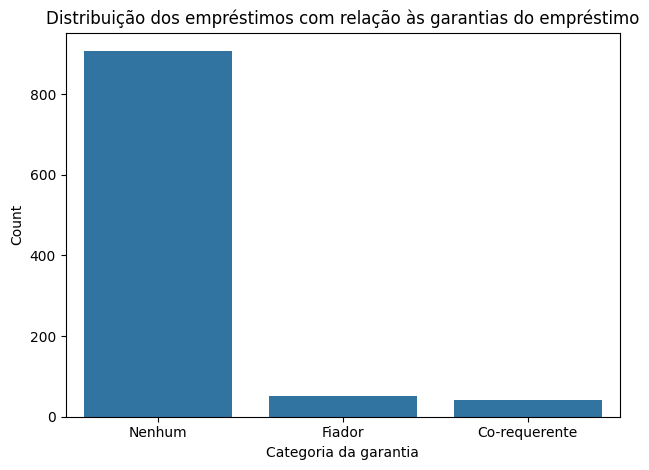

In [66]:
custom_labels = {1: 'Nenhum', 2: 'Co-requerente', 3: 'Fiador'}
sns.countplot(x=df['buerge'].map(custom_labels))

plt.title('Distribuição dos empréstimos com relação às garantias do empréstimo')
plt.xlabel('Categoria da garantia')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

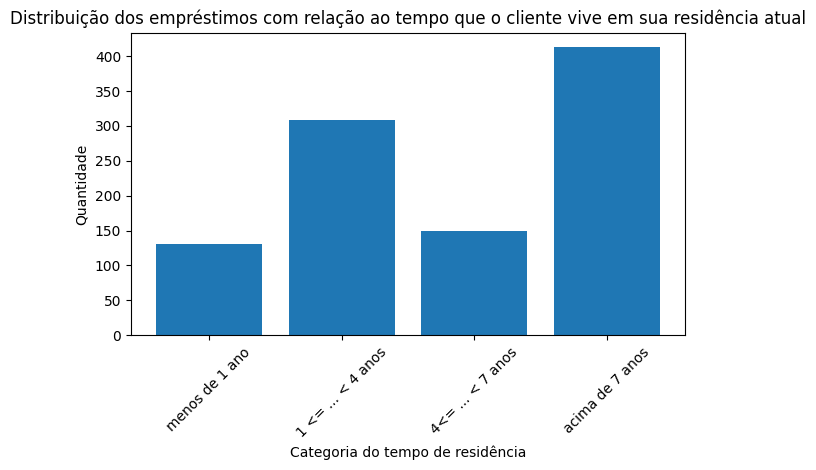

In [84]:
labels = {1: 'menos de 1 ano', 2: '1 <= ... < 4 anos', 3: '4<= ... < 7 anos', 4: 'acima de 7 anos'}

title = 'Distribuição dos empréstimos com relação ao tempo que o cliente vive em sua residência atual'
xlabel = 'Categoria do tempo de residência'
ylabel = 'Quantidade'

plot_graph('wohnzeit', labels, title, xlabel, ylabel)

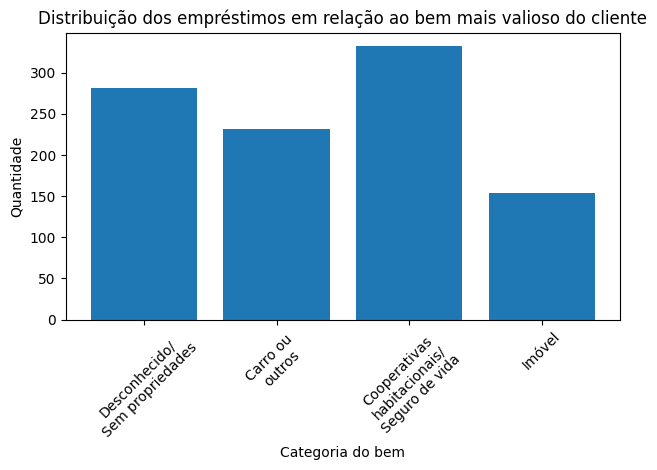

In [88]:
labels = {1: 'Desconhecido/\nSem propriedades', 
          2: 'Carro ou \noutros', 
          3: 'Cooperativas\nhabitacionais/\nSeguro de vida', 
          4: 'Imóvel'}

title = 'Distribuição dos empréstimos em relação ao bem mais valioso do cliente'
xlabel = 'Categoria do bem'
ylabel = 'Quantidade'

plot_graph('verm', labels, title, xlabel, ylabel)

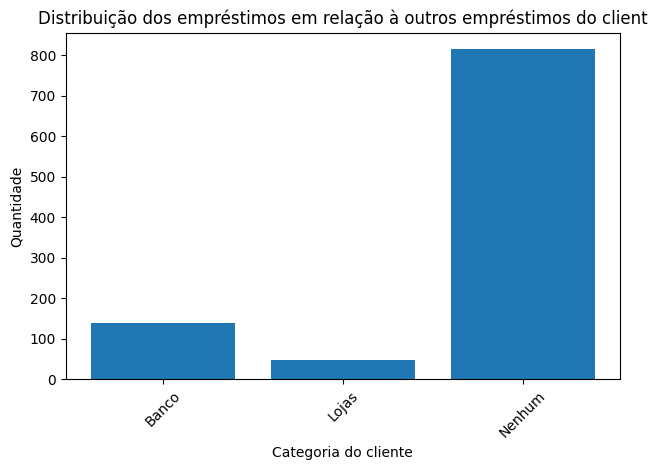

In [89]:
labels = {1: 'Banco', 
          2: 'Lojas', 
          3: 'Nenhum'}

title = 'Distribuição dos empréstimos em relação à outros empréstimos do cliente'
xlabel = 'Categoria do cliente'
ylabel = 'Quantidade'

plot_graph('weitkred', labels, title, xlabel, ylabel)

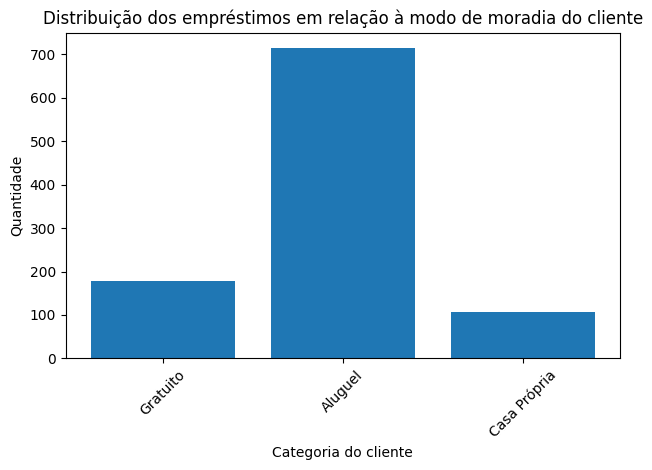

In [90]:
labels = {1: 'Gratuito', 
          2: 'Aluguel', 
          3: 'Casa Própria'}

title = 'Distribuição dos empréstimos em relação à modo de moradia do cliente'
xlabel = 'Categoria do cliente'
ylabel = 'Quantidade'

plot_graph('wohn', labels, title, xlabel, ylabel)

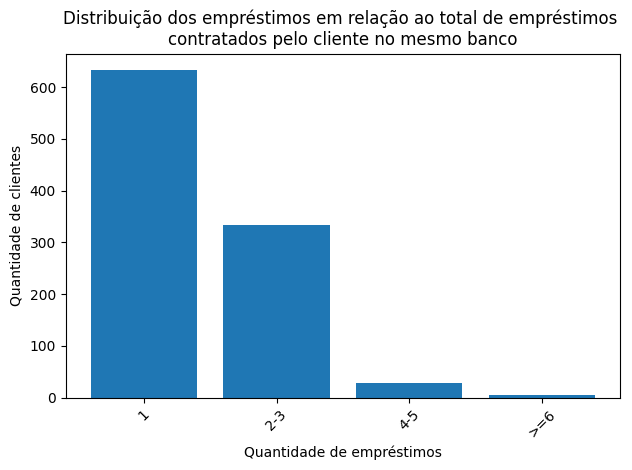

In [93]:
labels = {1: '1', 
          2: '2-3', 
          3: '4-5',
          4: '>=6'}

title = 'Distribuição dos empréstimos em relação ao total de empréstimos \ncontratados pelo cliente no mesmo banco'
xlabel = 'Quantidade de empréstimos'
ylabel = 'Quantidade de clientes'

plot_graph('bishkred', labels, title, xlabel, ylabel)

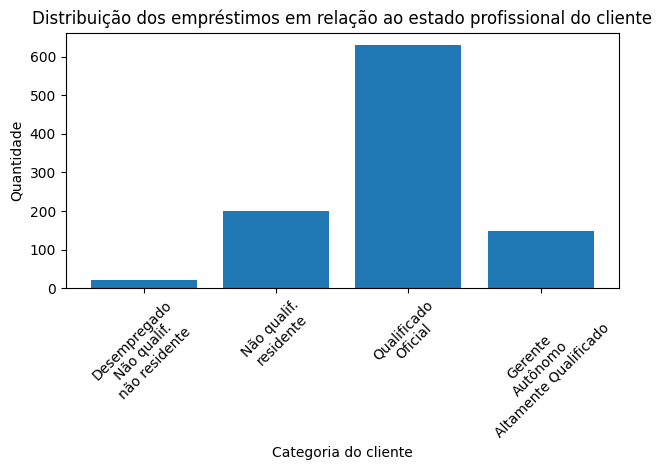

In [95]:
labels = {1: 'Desempregado\nNão qualif.\nnão residente', 
          2: 'Não qualif.\nresidente', 
          3: 'Qualificado\nOficial',
          4: 'Gerente\nAutônomo\nAltamente Qualificado'}

title = 'Distribuição dos empréstimos em relação ao estado profissional do cliente'
xlabel = 'Categoria do cliente'
ylabel = 'Quantidade'

plot_graph('beruf', labels, title, xlabel, ylabel)

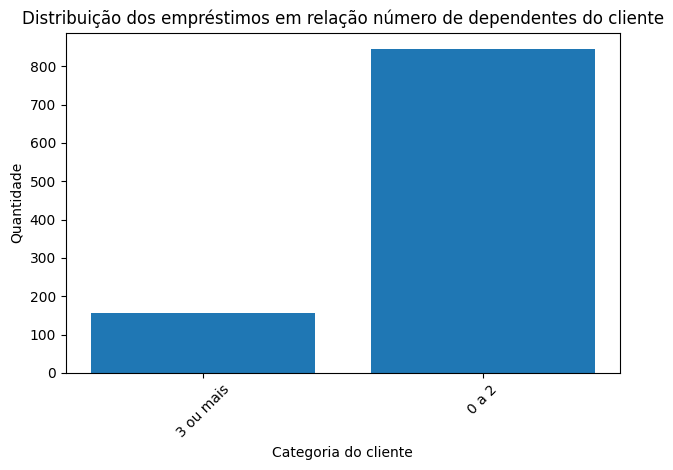

In [96]:
labels = {1: '3 ou mais', 
          2: '0 a 2'}

title = 'Distribuição dos empréstimos em relação número de dependentes do cliente'
xlabel = 'Categoria do cliente'
ylabel = 'Quantidade'

plot_graph('pers', labels, title, xlabel, ylabel)

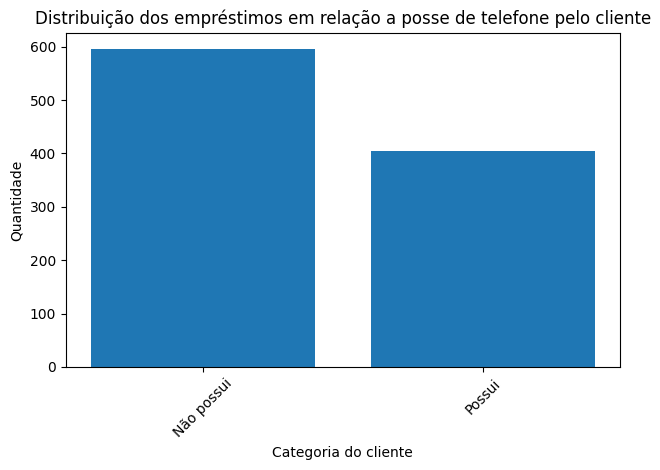

In [99]:
labels = {1: 'Não possui', 
          2: 'Possui'}

title = 'Distribuição dos empréstimos em relação a posse de telefone pelo cliente'
xlabel = 'Categoria do cliente'
ylabel = 'Quantidade'

plot_graph('telef', labels, title, xlabel, ylabel)

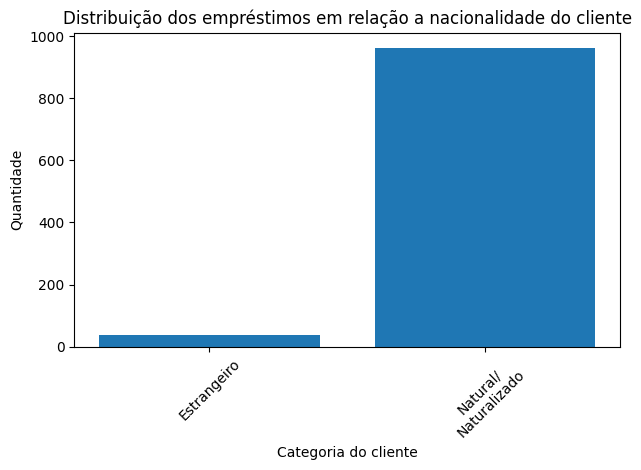

In [101]:
labels = {1: 'Estrangeiro', 
          2: 'Natural/\nNaturalizado'}

title = 'Distribuição dos empréstimos em relação a nacionalidade do cliente'
xlabel = 'Categoria do cliente'
ylabel = 'Quantidade'

plot_graph('gastarb', labels, title, xlabel, ylabel)

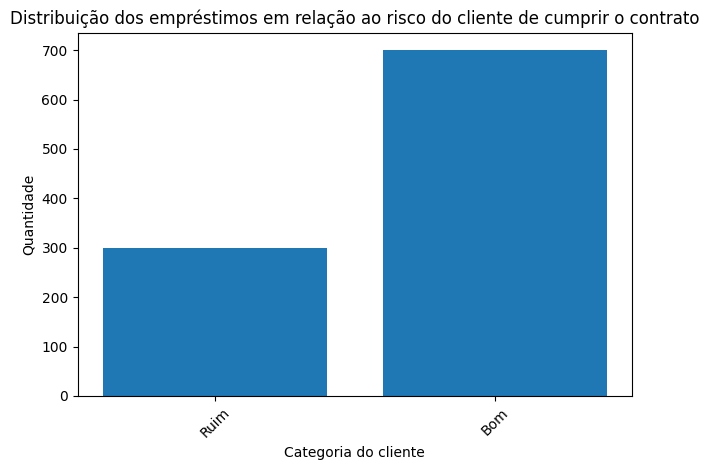

In [103]:
labels = {0: 'Ruim', 
          1: 'Bom'}

title = 'Distribuição dos empréstimos em relação ao risco do cliente de cumprir o contrato'
xlabel = 'Categoria do cliente'
ylabel = 'Quantidade'

plot_graph('kredit', labels, title, xlabel, ylabel)

In [ ]:
labels = {1: 'Desempregado\nbaixo nível\nnão residente', 
          2: 'Baixo nível\nresidente', 
          3: 'Emprego qualificado\nOficial',
          4: 'Gerente\nAutônomo\nEmprego Altamente Qualificado'}

title = 'Distribuição dos empréstimos em relação ao estado profissional do cliente'
xlabel = 'Categoria do cliente'
ylabel = 'Quantidade'

plot_graph('beruf', labels, title, xlabel, ylabel)

## Conclusões iniciais

Os clientes geralmente:

- Contrataram empréstimos entre 1365.5 e 3972.25 DM
- Assinaram contratos de atẽ 2 anos
- Possuem entre 27 e 42 anos
- Não possui conta corrente no banco ou possuem contas zeradas
- Nunca contratou um empréstimo ou pagou todos completamente
- Contratam empréstimo para compra de móveis/equipamentos ou carros
- Possuem menos de 100 DM em poupança
- Possuem emprego, frequentemente entre 1 e 4 anos
- Contratou um empréstimo cujas parcelas são de até 20% de seu salário líquido
- Contraram o empréstimo sem garantias nem fiadores
- Vivem em suas residências por mais de 7 anos
- Possuem suas residências ou apólices de seguro de vida como seu bem mais valioso
- Não possui outro empréstimo em paralelo
- Moram de aluguel
- Contrataram seu primeiro contrato do tipo
- Possuem empregos com alta qualificação
- Possuem até dois dependentes
- Não possuíam telefone próprio quando contrataram o empréstimo
- Eram cidadãos alemães
- Pagaram seus contratos completamente

## Correlações entre variáveis

## Relações entre variáveis categóricas e credit_risk

## Relações entre variáveis contínuas e credit_risk